# Final Project 

## Course: Programming For Business Intelligence 
Team: 3A
Team members:

1. Jayakar, Nikita- nmj303
2. Kappagantula, Sesha Sai Sreevani- ssk785
3. Kshirsagar, Rajas Paresh- rpk304
4. Kumbhar, Omkar- opk208
5. Li, Jiayi- jl12009

## Topic: World Development Indicators data related to Trade services among 12 countries


In [1]:
%load_ext memory_profiler


In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
import random
import matplotlib as cm
from itertools import cycle
from sklearn.linear_model import LinearRegression

# Data Collection and Cleaning

In [3]:
#get the csv file
csv_path = '9d02f30e-af5a-406a-9d93-a1b82876a8cf_Data.csv'
#read the csv data file of Exports as a capacity to imports of countries over years 1990-2019
df = pd.read_csv(csv_path)
#Remove 'Data from database: World Development Indicators' 'Last Updated: 02/17/2021' from csv file
df=df[:len(df)-1]
#as 2020 data not present but column is present in csv
del df['2020 [YR2020]']

### Basic information about dataset 

In [4]:
print("Total number of rows:",len(df))
print("\n\nValue count in each column\n",df.count())
print("Countries:\n")
print(df['Country Name'].unique())
print("Parameters Compared:\n")
print(df['Series Name'].unique())
print(df.head(5))
print(df.tail(5))
print(df.dtypes)
print(df.describe())

Total number of rows: 38548


Value count in each column
 Series Name      38545
Series Code      38544
Country Name     38544
Country Code     38544
1990 [YR1990]    38544
2000 [YR2000]    38544
2011 [YR2011]    38544
2012 [YR2012]    38544
2013 [YR2013]    38544
2014 [YR2014]    38544
2015 [YR2015]    38544
2016 [YR2016]    38544
2017 [YR2017]    38544
2018 [YR2018]    38544
2019 [YR2019]    38544
dtype: int64
Countries:

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Re

                             Series Name  Series Code      Country Name  \
count                              38545        38544             38544   
unique                               147          146               264   
top     Goods exports (BoP, current US$)  IC.EXP.TMDC  Macao SAR, China   
freq                                 264          264               146   

       Country Code 1990 [YR1990] 2000 [YR2000] 2011 [YR2011] 2012 [YR2012]  \
count         38544         38544         38544         38544         38544   
unique          264         12905         19003         23518         23850   
top             UGA            ..            ..            ..            ..   
freq            146         24278         15938         12081         10473   

       2013 [YR2013] 2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017]  \
count          38544         38544         38544         38544         38544   
unique         23462         25430         24389         25608      

### Renaming existing column names 

In [5]:
#rename columns
df = df.rename(columns={"Series Name":"series",
                              "Series Code":"series_code",
                              "Country Name": "country",
                              "Country Code":"country_code",
                              "1990 [YR1990]":"1990",
                              "2000 [YR2000]":"2000",
                              "2011 [YR2011]":"2011",
                              "2012 [YR2012]":"2012",
                              "2013 [YR2013]":"2013",
                              "2014 [YR2014]":"2014",
                              "2015 [YR2015]":"2015",
                              "2016 [YR2016]":"2016",
                              "2017 [YR2017]":"2017",
                              "2018 [YR2018]":"2018",
                              "2019 [YR2019]":"2019",
                             }
                    )
print(df.head(5))

                         series        series_code         country  \
0  Trade in services (% of GDP)  BG.GSR.NFSV.GD.ZS     Afghanistan   
1  Trade in services (% of GDP)  BG.GSR.NFSV.GD.ZS         Albania   
2  Trade in services (% of GDP)  BG.GSR.NFSV.GD.ZS         Algeria   
3  Trade in services (% of GDP)  BG.GSR.NFSV.GD.ZS  American Samoa   
4  Trade in services (% of GDP)  BG.GSR.NFSV.GD.ZS         Andorra   

  country_code              1990              2000              2011  \
0          AFG                ..                ..  23.3352785208429   
1          ALB   2.9873499777859  25.5318768299992  39.2694286333975   
2          DZA  2.94564564727633                ..  8.08678139486023   
3          ASM                ..                ..                ..   
4          AND                ..                ..                ..   

               2012              2013              2014              2015  \
0  18.1644317303653  11.7015628332624  13.8747039403739  10.325596858

### Finding duplicate rows and dropping them 

In [6]:
# Total number of rows and columns
print(df.shape)
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df)
print('number of duplicate rows:', duplicate_rows_df.shape)

(38548, 15)
      series series_code country country_code 1990 2000 2011 2012 2013 2014  \
38545    NaN         NaN     NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN   
38546    NaN         NaN     NaN          NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      2015 2016 2017 2018 2019  
38545  NaN  NaN  NaN  NaN  NaN  
38546  NaN  NaN  NaN  NaN  NaN  
number of duplicate rows: (2, 15)


In [7]:
# Dropping the duplicates 
df = df.drop_duplicates()
print('number of duplicate rows:', df[df.duplicated()])

number of duplicate rows: Empty DataFrame
Columns: [series, series_code, country, country_code, 1990, 2000, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Index: []


### Finding null values and dropping them 

In [8]:
# Finding the null values count in each column.
print("\n\nNull values in each column:\n",df.isnull().sum())
df=df.dropna()
print("\n\nAfter removing Null values:\n",df.isnull().sum())




Null values in each column:
 series          1
series_code     2
country         2
country_code    2
1990            2
2000            2
2011            2
2012            2
2013            2
2014            2
2015            2
2016            2
2017            2
2018            2
2019            2
dtype: int64


After removing Null values:
 series          0
series_code     0
country         0
country_code    0
1990            0
2000            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
dtype: int64


### Organizing data into data structures for easy computations 

In [9]:
'''Data Structures Used:
    List
    Dictionary
'''

'Data Structures Used:\n    List\n    Dictionary\n'

In [10]:
# Below are selected 12 countries put in the form of list
countries = ['India','Japan','Brazil','Australia','Germany','Spain',
            'United States','United Kingdom','Sweden','Portugal','New Zealand','China']

In [11]:
# Below are 12 services selected put in the form of list
services = ['Trade (% of GDP)',
            'Merchandise trade (% of GDP)','Imports of goods and services (% of GDP)',
            'Import value index (2000 = 100)','Import volume index (2000 = 100)',
            'Food exports (% of merchandise exports)','Food imports (% of merchandise imports)',
            'Fuel exports (% of merchandise exports)','Fuel imports (% of merchandise imports)',
            'Exports of goods and services (% of GDP)','Export value index (2000 = 100)',
            'Export volume index (2000 = 100)']

In [12]:
# Below are the years for which data is already available and is put in the form of list
years = ['1990', '2000', '2011', '2012',
         '2013', '2014', '2015', '2016',
         '2017', '2018', '2019']

## Options of storing the data

## 1. Dividing the CSV into different dataframes based on services

In [13]:
%%writefile memscript_services_df.py
import pandas as pd
def get_services_df(df,services,countries,years):
    services_struct = {service:[] for service in services}
    for i,value in df.iterrows():
        service = value['series']
        if service in services:
            country = value['country']
            if country in countries:
                # add years to a dictionary
                years_dict = {int(year):float(value) 
                              if value != '..' else None
                              for year,value in zip(years,list(df[years].iloc[i]))}
                # add country to the dictionary
                years_dict['country'] = country
                # create a list of dictionaries for services dict
                services_struct[service].append(years_dict)

    service_dfs = {service:None for service in services}
    for key in service_dfs.keys():
        service_df = pd.DataFrame.from_records(services_struct[key]).set_index('country')
        service_df.drop_duplicates()
        service_dfs[key] = service_df
    return service_dfs

Overwriting memscript_services_df.py


In [14]:
from  memscript_services_df import get_services_df
%mprun -T mprof0 -f get_services_df get_services_df(df,services,countries,years)



*** Profile printout saved to text file mprof0. 


In [15]:
print(open('mprof0', 'r').read())

Filename: /Users/omkarkumbhar/Desktop/programming/project/memscript_services_df.py

Line #    Mem usage    Increment  Occurences   Line Contents
     2    158.4 MiB    158.4 MiB           1   def get_services_df(df,services,countries,years):
     3    158.4 MiB      0.0 MiB          15       services_struct = {service:[] for service in services}
     4    158.5 MiB    -22.4 MiB       38545       for i,value in df.iterrows():
     5    158.5 MiB    -23.0 MiB       38544           service = value['series']
     6    158.5 MiB    -23.0 MiB       38544           if service in services:
     7    158.5 MiB     -0.7 MiB        3168               country = value['country']
     8    158.5 MiB      0.0 MiB        3168               if country in countries:
     9                                                         # add years to a dictionary
    10    158.5 MiB      0.0 MiB        5328                   years_dict = {int(year):float(value) 
    11    158.5 MiB      0.0 MiB        1626     

In [16]:
%%memit
service_dfs = get_services_df(df,services,countries,years)

peak memory: 158.77 MiB, increment: 0.24 MiB


In [17]:
%%timeit
service_dfs = get_services_df(df,services,countries,years)

3.06 s ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
service_dfs['Trade (% of GDP)']

,1990,2000,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,
Australia,32.219829,41.029011,41.906733,43.210347,41.208430,42.506490,41.494373,40.777641,41.818720,43.262648,45.710459
Brazil,15.161756,22.639761,23.934411,25.114294,25.785976,24.685406,26.953643,24.533698,24.327714,29.397783,28.976624
China,24.273132,39.410539,50.740905,48.267522,46.744376,44.905216,39.464169,36.894415,37.632413,37.456244,35.680087
Germany,45.863588,61.526061,85.206121,86.514055,85.078877,84.620093,86.246225,84.769646,87.411699,88.596387,87.989127
India,15.506262,26.900923,55.623865,55.793722,53.844132,48.922186,41.922914,40.082486,40.722811,43.404969,39.550061
Japan,19.662749,19.819653,30.393003,30.636124,34.147522,37.545770,35.641021,31.541805,34.573438,36.816507,NaN
New Zealand,52.608142,68.516927,59.163533,57.009745,56.034961,55.175930,54.799123,52.210157,53.850172,55.941950,NaN
Portugal,65.055593,67.452998,73.099544,76.050839,78.114435,80.282308,80.490894,79.274230,84.439141,86.428761,86.782327
Spain,35.610733,60.082334,58.793171,60.845370,61.996299,63.865610,64.212641,63.772624,66.692573,67.572853,66.776165


In [19]:
for key in service_dfs.keys():
    print('Current Service: {}'.format(key))
    print(service_dfs[key].head())
    print('****************')

Current Service: Trade (% of GDP)
                1990       2000       2011       2012       2013       2014  \
country                                                                       
Australia  32.219829  41.029011  41.906733  43.210347  41.208430  42.506490   
Brazil     15.161756  22.639761  23.934411  25.114294  25.785976  24.685406   
China      24.273132  39.410539  50.740905  48.267522  46.744376  44.905216   
Germany    45.863588  61.526061  85.206121  86.514055  85.078877  84.620093   
India      15.506262  26.900923  55.623865  55.793722  53.844132  48.922186   

                2015       2016       2017       2018       2019  
country                                                           
Australia  41.494373  40.777641  41.818720  43.262648  45.710459  
Brazil     26.953643  24.533698  24.327714  29.397783  28.976624  
China      39.464169  36.894415  37.632413  37.456244  35.680087  
Germany    86.246225  84.769646  87.411699  88.596387  87.989127  
India     

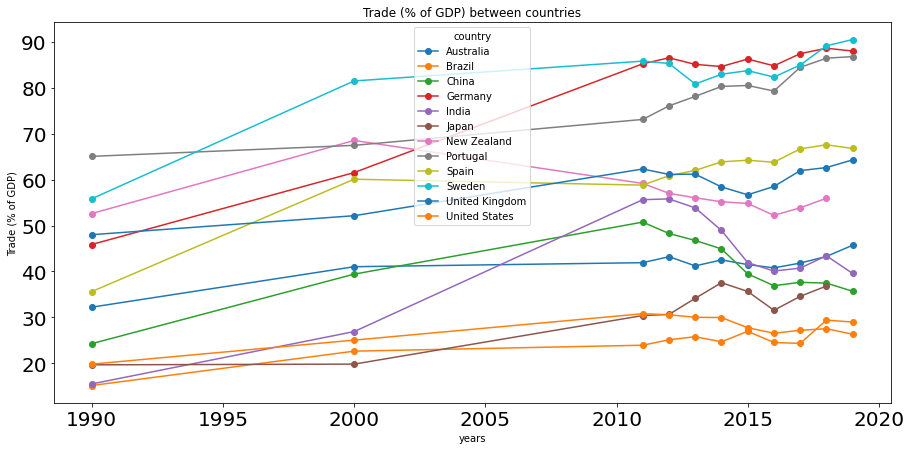

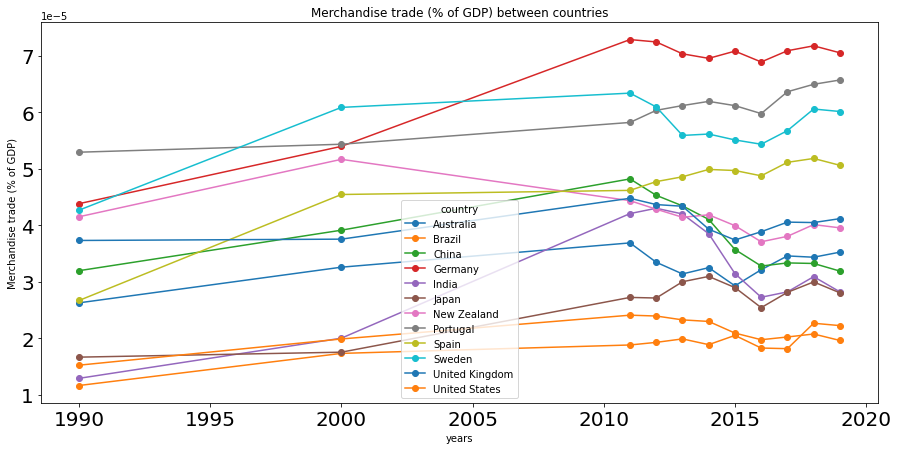

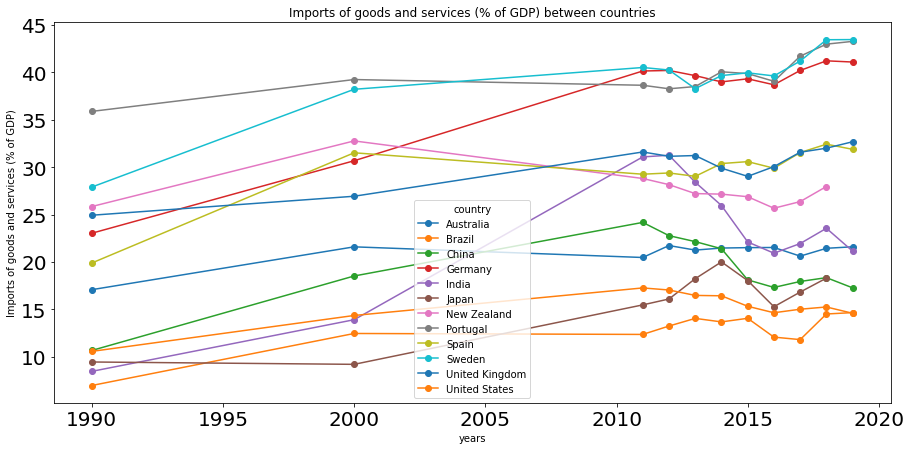

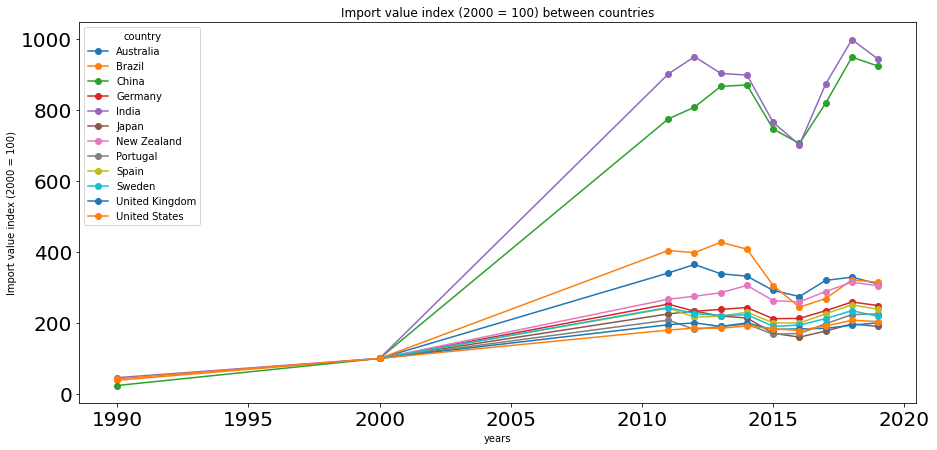

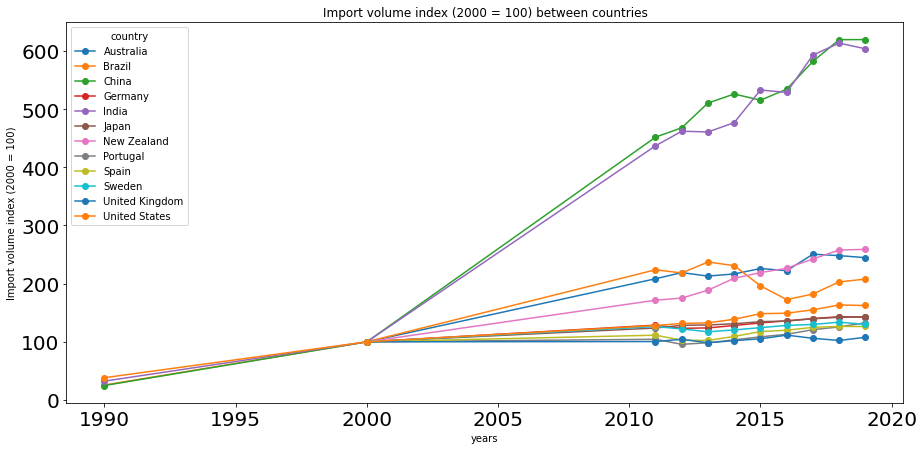

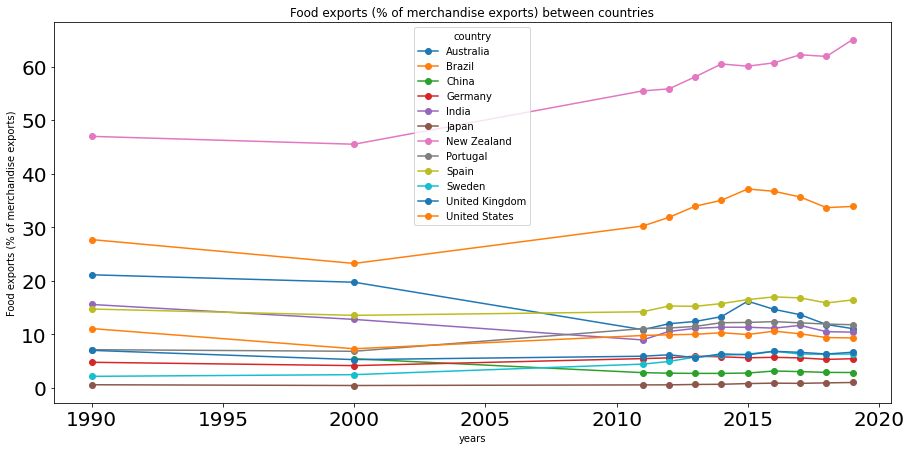

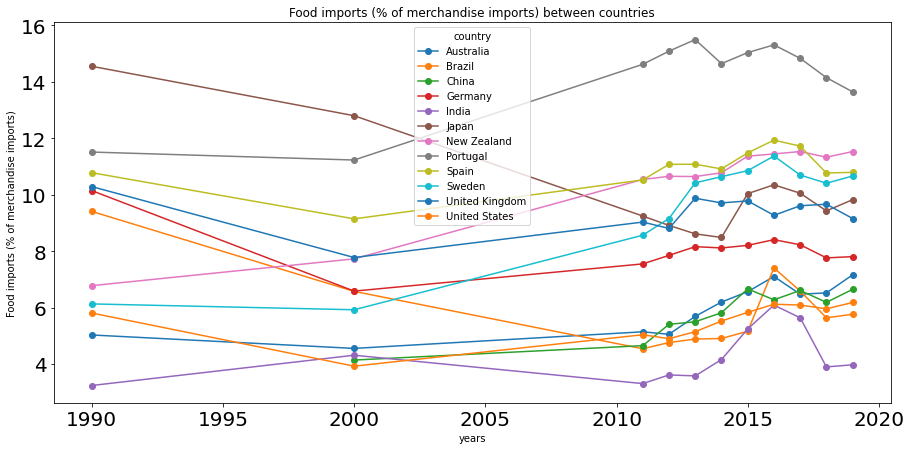

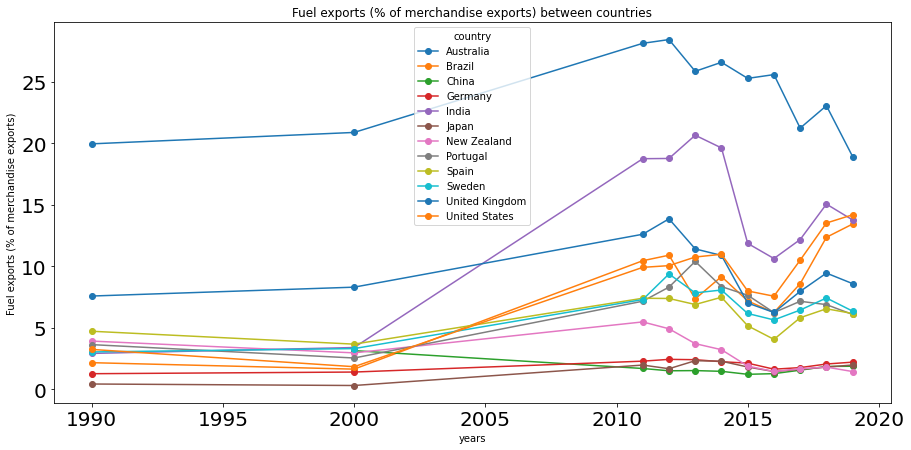

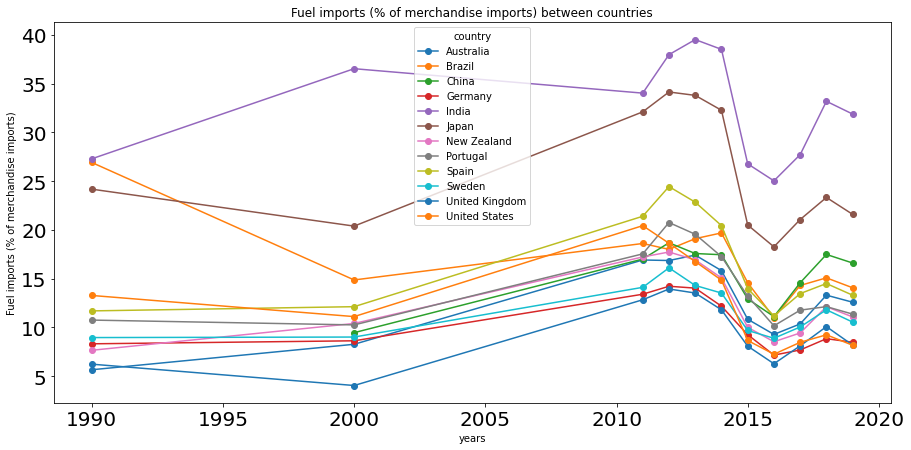

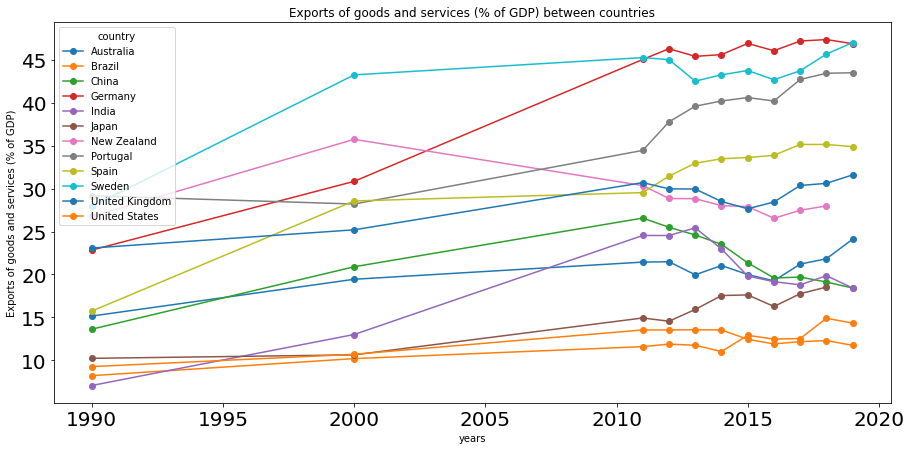

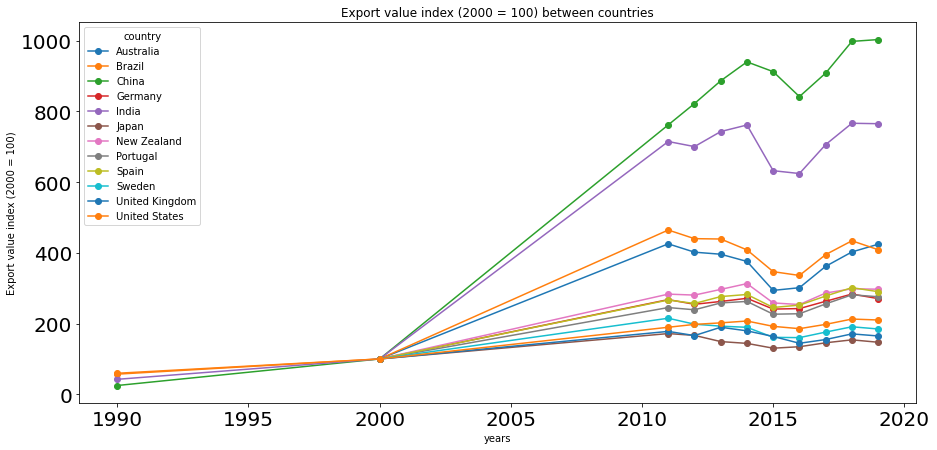

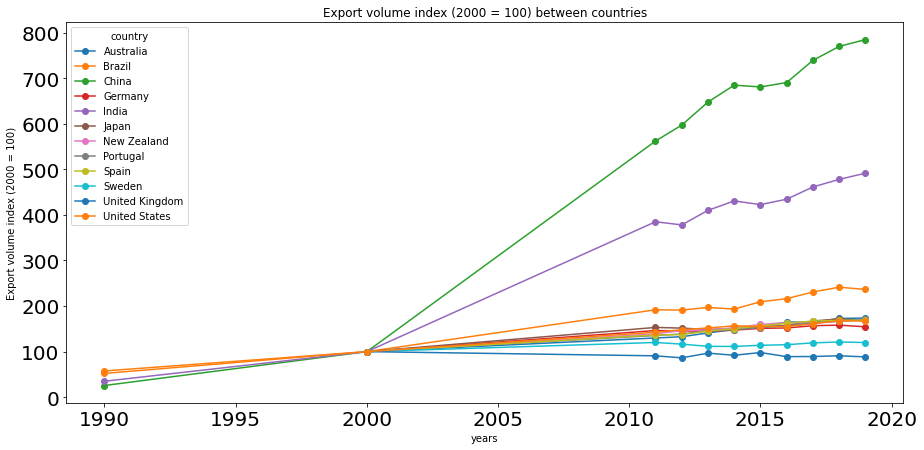

In [20]:
for service in service_dfs.keys():
    service_dfs[service].T.plot(figsize=(15,7), xlabel='years',ylabel=service,
                                title = '{} between countries'.format(service),
                                style='o-',fontsize=20)

## 2. Using a Nested Dictionary

In [21]:
%%writefile memscript_services_dict.py
# Below a dictionary of dictionary is created which maps a service with its countries for which 
# each country is further mapped with values for all the years 
def get_services_dict(df,services,countries,years):
    services_dict = {service:{} for service in services}
    for i,value in df.iterrows():
        service = value['series']
        if service in services:
            country = value['country']
            if country in countries:
                services_dict[service][country] = {year:value 
                                                   for year,value 
                                                   in zip(years,list(df[years].iloc[i]))}
    return services_dict

Overwriting memscript_services_dict.py


In [22]:
from memscript_services_dict import get_services_dict
%mprun -T mprof1 -f get_services_dict get_services_dict(df,services,countries,years)



*** Profile printout saved to text file mprof1. 


In [23]:
print(open('mprof1', 'r').read())

Filename: /Users/omkarkumbhar/Desktop/programming/project/memscript_services_dict.py

Line #    Mem usage    Increment  Occurences   Line Contents
     3    198.0 MiB    198.0 MiB           1   def get_services_dict(df,services,countries,years):
     4    198.0 MiB      0.0 MiB          15       services_dict = {service:{} for service in services}
     5    201.3 MiB      0.0 MiB       38545       for i,value in df.iterrows():
     6    201.3 MiB      0.0 MiB       38544           service = value['series']
     7    201.3 MiB      0.0 MiB       38544           if service in services:
     8    201.3 MiB      0.0 MiB        3168               country = value['country']
     9    201.3 MiB      0.0 MiB        3168               if country in countries:
    10    201.3 MiB      0.0 MiB        3744                   services_dict[service][country] = {year:value 
    11    201.3 MiB      0.0 MiB        1584                                                      for year,value 
    12    201.3

In [24]:
%%memit
services_dict = get_services_dict(df,services,countries,years)

peak memory: 185.23 MiB, increment: 1.67 MiB


In [25]:
%%timeit
services_dict = get_services_dict(df,services,countries,years)

3.03 s ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
del service_dfs
del services_dict

## duplicate dataframes and make it 3x in size

In [27]:
df2 = df.copy()
df3 = df.copy()
df = df.append([df2, df3])

### service dataframes

In [28]:
%%memit
service_dfs = get_services_df(df,services,countries,years)

peak memory: 216.98 MiB, increment: 9.64 MiB


In [29]:
%%timeit
service_dfs = get_services_df(df,services,countries,years)

11.9 s ± 71.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### service dictionaries

In [30]:
%%memit
services_dict = get_services_dict(df,services,countries,years)

peak memory: 217.11 MiB, increment: 0.00 MiB


In [31]:
%%timeit
services_dict = get_services_dict(df,services,countries,years)

12 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
del service_dfs
del services_dict

## duplicate dataframes and make it 9x in size

In [33]:
df2 = df.copy()
df3 = df.copy()
df = df.append([df2, df3])

In [34]:
%%memit
service_dfs = get_services_df(df,services,countries,years)

peak memory: 309.04 MiB, increment: 29.11 MiB


In [35]:
%%timeit
service_dfs = get_services_df(df,services,countries,years)

1min 2s ± 1.33 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%memit
services_dict = get_services_dict(df,services,countries,years)

peak memory: 307.29 MiB, increment: 0.00 MiB


In [37]:
%%timeit
services_dict = get_services_dict(df,services,countries,years)

1min 3s ± 580 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
# labels = ['1x','3x','9x']
# times_df = [3.05 s ± 83.6,12 s ± 186,1min ± 557]
# meminc_df = [0.22,8.15,29.27]

# times_dict = [3.05 s ± 83.6,11.8 s ± 40.6,1min 1s ± 605]
# meminc_dict = [0.22,0.22,0.22]